<a href="https://colab.research.google.com/github/dany444/one/blob/main/Moy_Lab_7_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


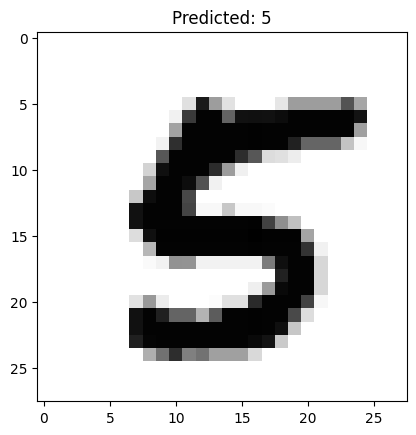

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.98949124]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Функции активации
def relu(x):
    return np.maximum(0, x)

def drelu(x):
    return np.where(x > 0, 1, 0)

# Загрузка данных
def load_dataset():
    with np.load("custom.npz") as f:
        x_train = f["x_train"].astype("float32") / 255  # Нормализация данных
        x_train = np.reshape(x_train, (x_train.shape[0], -1))
        y_train = f["y_train"]
        y_train = np.eye(10)[y_train]  # Преобразование меток в one-hot
    return x_train, y_train

# Нейронная сеть
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001, lambda_reg=0.01):
        self.w1 = np.random.randn(hidden_size, input_size) * 0.01 # Инициализация с меньшими весами
        self.b1 = np.zeros((hidden_size, 1))  # Инициализация смещения для первого слоя
        self.w2 = np.random.randn(output_size, hidden_size) * 0.01 # Инициализация с меньшими весами
        self.b2 = np.zeros((output_size, 1))  # Инициализация смещения для второго слоя
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg

    def forward(self, x):
        self.l1 = np.dot(self.w1, x) + self.b1
        self.y = relu(self.l1)
        self.l2 = np.dot(self.w2, self.y) + self.b2
        self.out = relu(self.l2)  # Можно использовать softmax для классификации
        return self.out

    def backward(self, x, target):
        e = self.out - target

        delta2 = e * drelu(self.l2)  # Градиент на выходе
        grad_w2 = np.dot(delta2, self.y.T) + self.lambda_reg * self.w2  # Градиент для w2
        grad_b2 = np.sum(delta2, axis=1, keepdims=True) # Градиент для b2

        delta1 = np.dot(self.w2.T, delta2) * drelu(self.l1) # Градиент для скрытого слоя
        grad_w1 = np.dot(delta1, x.T) + self.lambda_reg * self.w1  # Градиент для w1
        grad_b1 = np.sum(delta1, axis=1, keepdims=True) # Градиент для b1

        # Обновление весов и смещений
        self.w2 -= self.learning_rate * grad_w2
        self.b2 -= self.learning_rate * grad_b2
        self.w1 -= self.learning_rate * grad_w1
        self.b1 -= self.learning_rate * grad_b1

    def train(self, x_train, y_train, epochs=5, batch_size=32):
        for epoch in range(epochs):
            print(f'Epoch {epoch + 1}/{epochs}')
            indices = np.arange(x_train.shape[0])
            np.random.shuffle(indices)  # Перемешивание данных
            for start in range(0, x_train.shape[0], batch_size):
                end = min(start + batch_size, x_train.shape[0])
                batch_indices = indices[start:end]

                for i in batch_indices:
                    img = x_train[i].reshape(-1, 1)
                    value = y_train[i].reshape(-1, 1)

                    self.forward(img)
                    self.backward(img, value)
# Основной код
input_data, target_data = load_dataset()
nn = SimpleNN(input_size=784, hidden_size=50, output_size=10)

# Обучение модели
nn.train(input_data, target_data, epochs=5, batch_size=32)

# Тестирование на случайном изображении
i = np.random.randint(0, input_data.shape[0])
tempimg = input_data[i]
tempvalue = target_data[i]

img = tempimg.reshape(-1, 1)
out = nn.forward(img)

plt.imshow(tempimg.reshape(28, 28), cmap="Greys")
plt.title(f'Predicted: {out.argmax()}')
plt.show()

print(out)


In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Загрузка набора данных MNIST
(x_train, y_train), _ = mnist.load_data()

# Сохранение данных в файл custom.npz
np.savez("custom.npz", x_train=x_train, y_train=y_train)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


0
1
2
3
4


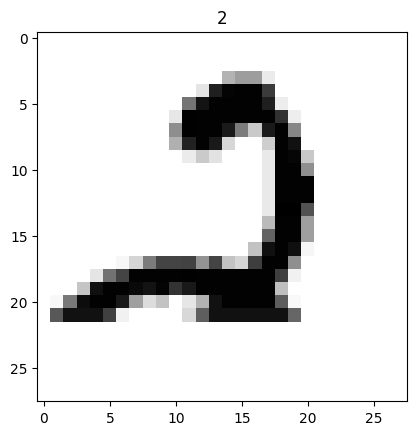

[[0.40467089]
 [0.19544378]
 [0.91504171]
 [0.38178217]
 [0.14766369]
 [0.09538043]
 [0.50526293]
 [0.3556995 ]
 [0.179371  ]
 [0.28854671]]


In [2]:
#нейронка цифры
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 1 / (1 + np.exp(-x))

def df(x):
    return f(x) * (1 - f(x))

def drelu(x):
    return np.heaviside(x, 0)

def load_dataset():
    with np.load("custom.npz") as f:
        x_train = f["x_train"].astype("float32") / 255 #оттенки серого в интервале от 0 до 255]
        x_train = np.reshape(
            x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[1])
        )
        y_train = f["y_train"]
        y_train = np.eye(10)[y_train]

        return x_train, y_train



input, values = load_dataset()


w1 = np.random.uniform(-0.5, 0.5, (50, 784))
w2 = np.random.uniform(-0.5, 0.5, (10, 50))

lmb = 0.0001

for i in range(5):
    print(i)
    #прямой
    for img, value in zip(input, values):
        img = np.reshape(img, (-1, 1))
        value = np.reshape(value, (-1, 1))

        l1 = np.dot(w1, img)
        y = f(l1)
        l2 = np.dot(w2, y)
        out = f(l2)
        #обратный
        e = out - value
        delta2 = e - df(out)
        w2 = w2 - lmb * np.dot(delta2, y.T)
        delta1 = np.dot(w2.T, delta2) * drelu(y)
        w1 = w1 - lmb * np.dot(delta1, img.T)

i = np.random.randint(0, 60000)
tempimg = input[i]
tempvalue = values[i]

img = np.reshape(tempimg, (-1, 1))
l1 = np.dot(w1, img)
y = f(l1)
l2 = np.dot(w2, y)
out = f(l2)

plt.imshow(tempimg.reshape(28, 28), cmap="Greys")
plt.title(out.argmax())
plt.show()

print(out)


0
1
2
3
4


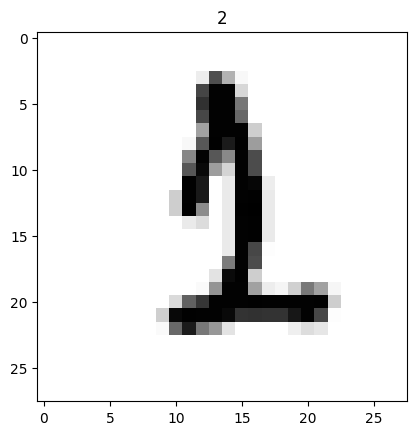

[[0.31874112]
 [0.3183667 ]
 [0.60851276]
 [0.51391092]
 [0.11445974]
 [0.37482756]
 [0.60431616]
 [0.34757468]
 [0.15544683]
 [0.46155735]]


In [ ]:
#нейронка цифры
import numpy as np
import matplotlib.pyplot as plt

#сигмоидная функция
def f(x):
    return 1 / (1 + np.exp(-x)) #Это сигмоидная функция, которая используется для активации нейронов. Она ограничивает выход нейрона значениями от 0 до 1.

def df(x):
    return f(x) * (1 - f(x)) #Это производная сигмоидной функции, которая понадобится для обратного распространения ошибки при обновлении весов.

#активация
def relu(x):
    return np.maximum(x, 0) #Это функция активации ReLU (Rectified Linear Unit), которая возвращает максимальное значение между 0 и входным значением.
#функцией максимального значения
def drelu(x):
    return np.heaviside(x, 0) #Производная функции ReLU. Возвращает 1, если входное значение больше 0, и 0, если меньше.

#MNIST грузит
def load_dataset(): #Эта функция загружает набор данных из файла custom.npz
    with np.load("custom.npz") as f: #Загружает файл данных с расширением .npz
        x_train = f["x_train"].astype("float32") / 255 #[оттенки серого в интервале от 0 до 255] #Изображения цифр. Они нормализуются делением на 255 (значения пикселей от 0 до 1).
        x_train = np.reshape(
            x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[1]) #Изменяет каждое изображение из двумерного массива (например, 28x28) в одномерный вектор (784), чтобы каждая строка представляла одно изображение в виде вектора.
        )
        y_train = f["y_train"]
        y_train = np.eye(10)[y_train] #Метки классов (цифры от 0 до 9). Используется преобразование в one-hot encoding, чтобы каждую метку представить как вектор длины 10, где только один элемент равен 1 (например, [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] для цифры 2).
#Например, метка 2 преобразуется в вектор [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].
        return x_train, y_train #Функция возвращает два массива: x_train (изображения в виде одномерных векторов) и y_train (one-hot метки). Эти данные готовы для использования в процессе обучения нейронной сети.


#веса и скорость обучения

input, values = load_dataset()


w1 = np.random.uniform(-0.5, 0.5, (50, 784)) #Веса между входным слоем и скрытым слоем. Размерность: 50 нейронов в скрытом слое и 784 входных (28x28 пикселей).
w2 = np.random.uniform(-0.5, 0.5, (10, 50)) #Веса между скрытым и выходным слоями. Размерность: 10 нейронов на выходе (по одному для каждой цифры) и 50 нейронов скрытого слоя.

lmb = 0.0001 #Это коэффициент скорости обучения (learning rate), который контролирует величину изменений весов при обратном распространении.

#cам цикл
for i in range(5):
    print(i)
    #прямой проход
    for img, value in zip(input, values): #Последовательно обрабатываются каждое изображение и его метка.
        img = np.reshape(img, (-1, 1))
        value = np.reshape(value, (-1, 1))

        l1 = np.dot(w1, img) #Линейная комбинация входных данных с весами первого слоя (вход->скрытый слой).
        y = f(l1) #Результат применения функции активации (сигмоида) к выходу скрытого слоя.
        l2 = np.dot(w2, y) #Линейная комбинация результатов скрытого слоя и весов второго слоя (скрытый слой->выходной слой).
        out = f(l2) #Применение сигмоиды ко второму слою, чтобы получить предсказание.
        #обратный
        e = out - value #Ошибка между предсказанным результатом сети и истинным значением (разность).
        delta2 = e - df(out) # Градиент ошибки для второго слоя, умноженный на производную функции активации.
        w2 = w2 - lmb * np.dot(delta2, y.T) #Обновление весов второго слоя с использованием скорости обучения и производной ошибки.
        delta1 = np.dot(w2.T, delta2) * drelu(y) #Градиент для первого слоя, рассчитанный через обратное распространение ошибки.
        w1 = w1 - lmb * np.dot(delta1, img.T) #Обновление весов первого слоя.

#случайный набор
i = np.random.randint(0, 60000)
tempimg = input[i] #Выбирается случайное изображение из обучающего набора данных для тестирования.
tempvalue = values[i]

#проход
img = np.reshape(tempimg, (-1, 1)) #Прямой проход: Изображение пропускается через сеть (вход->скрытый слой->выходной слой).
l1 = np.dot(w1, img)
y = f(l1)
l2 = np.dot(w2, y)
out = f(l2)

plt.imshow(tempimg.reshape(28, 28), cmap="Greys") #Отображение случайно выбранного изображения.
plt.title(out.argmax()) #Вывод предсказанного класса (цифра) на основе максимального значения выходного слоя.
plt.show() #Печатает вектор предсказания, показывающий вероятности для каждого из 10 классов.

print(out)


In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Загрузка набора данных MNIST
(x_train, y_train), _ = mnist.load_data()

# Сохранение данных в файл custom.npz
np.savez("custom.npz", x_train=x_train, y_train=y_train)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
